# Loading libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Description of Data

Total Loans that banks give to each customer type at the end of each month e.g e-commerce, agriculture. This Dataset is obtained from MAS (Monetary Authority of Singapore) from Mar 2024 to Aug 2015.

https://data.gov.sg/datasets/d_c2e116320c9d36f6ea6cdd82fb763de2/view

Business Use Case: 
- Which customer type that banks tend to give loans to?
- How does the total loans given to each customer type change overtime?

In [18]:
# Read in the dataset for Total Loans to non-bank customers by type
df = pd.read_csv("../data/TotalLoanstoNonBankCustomersbyType.csv")

In [32]:
df.head()
# month: datetime that the total_loans are recorded.
# level_1: Denotes whether the loans are for Business or Consumer.
# level_2: subcategory of level_1, which we call as customer_type
# total_loans in millions

,month,level_1,level_2,total_loans,datetime
0,2004-03,Business,"Agriculture, Mining and Quarrying",2484.6,2004-03-01
1,2004-03,Business,Manufacturing,27557.8,2004-03-01
2,2004-03,Business,Building and Construction,29724.9,2004-03-01
3,2004-03,Business,General Commerce,30577.5,2004-03-01
4,2004-03,Business,"Transport, Storage and Communication",25227.6,2004-03-01


In [19]:
df.shape 

(1932, 4)

In [20]:
# Data Preprocessing
df["datetime"] = pd.to_datetime(df['month'])

# Check the earliest year and latest year
print(df.sort_values(by = 'datetime').head())
print(df.sort_values(by = "datetime", ascending = False).head())

      month   level_1                                            level_2  \
0   2004-03  Business                  Agriculture, Mining and Quarrying   
13  2004-03  Consumer      Professional and Private Individuals - Others   
12  2004-03  Consumer  Professional and Private Individuals - Share F...   
11  2004-03  Consumer  Professional and Private Individuals - Credit ...   
9   2004-03  Consumer                         Housing and Bridging Loans   

    total_loans   datetime  
0        2484.6 2004-03-01  
13      27203.4 2004-03-01  
12        419.5 2004-03-01  
11       3253.3 2004-03-01  
9       55419.4 2004-03-01  
        month   level_1                                        level_2  \
1931  2015-08  Consumer  Professional and Private Individuals - Others   
1924  2015-08  Business                         Financial Institutions   
1918  2015-08  Business              Agriculture, Mining and Quarrying   
1919  2015-08  Business                                  Manufacturing   

Earliest year is 2004, latest year is 2015.

In [21]:
# Distinct categories
np.unique(df['level_1'])

array(['Business', 'Consumer'], dtype=object)

In [22]:
# Distinct Subcategories
np.unique(df['level_2'])
print(np.unique(df['level_2']))

customer_types = df['level_2']

['Agriculture, Mining and Quarrying' 'Building and Construction'
 'Business Services' 'Financial Institutions' 'General Commerce'
 'Housing and Bridging Loans' 'Manufacturing' 'Others'
 'Professional and Private Individuals - Business Purposes'
 'Professional and Private Individuals - Car Loans'
 'Professional and Private Individuals - Credit Cards'
 'Professional and Private Individuals - Others'
 'Professional and Private Individuals - Share Financing'
 'Transport, Storage and Communication']


In [23]:
# Describe the dataset
df.describe()

,total_loans,datetime
count,1932.000000,1932
mean,46704.904762,2009-11-15 12:20:52.173913344
min,391.600000,2004-03-01 00:00:00
25%,8951.775000,2007-01-01 00:00:00
50%,31644.300000,2009-11-16 00:00:00
75%,72573.525000,2012-10-01 00:00:00
max,203546.500000,2015-08-01 00:00:00
std,46515.193402,NaN


In [24]:
# Check if have any missing values
df.isnull().sum()

month          0
level_1        0
level_2        0
total_loans    0
datetime       0
dtype: int64

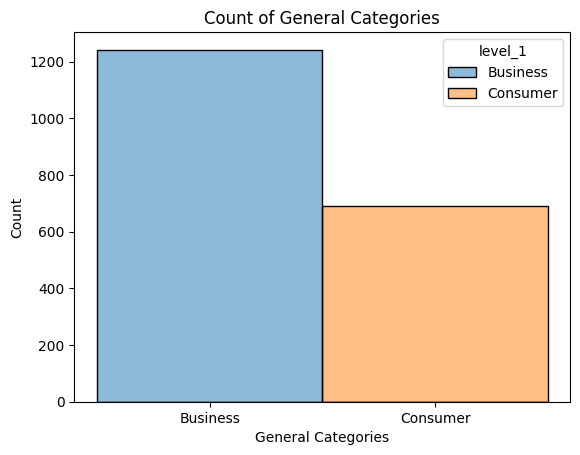

In [25]:
sns.histplot(x = 'level_1', data = df, hue = 'level_1')
plt.title("Count of General Categories")
plt.xlabel("General Categories")
plt.ylabel("Count")
plt.show()

We have higher count for business uses than consumer uses.

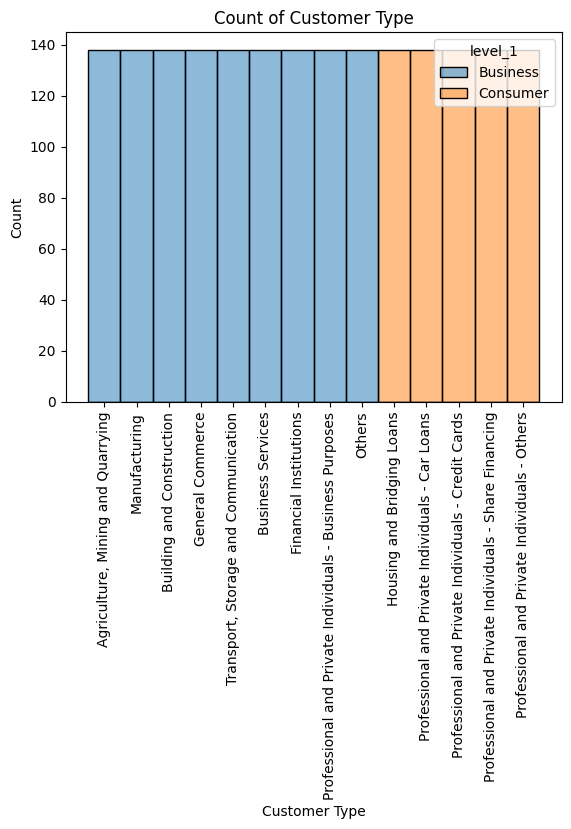

In [26]:
sns.histplot(x = 'level_2', data = df, hue = 'level_1')
plt.xticks(rotation = 90)
plt.title("Count of Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()

This shows that we have relatively constant count for each of the customer type (sub categories).

Text(0, 0.5, 'Total loans (in million)')

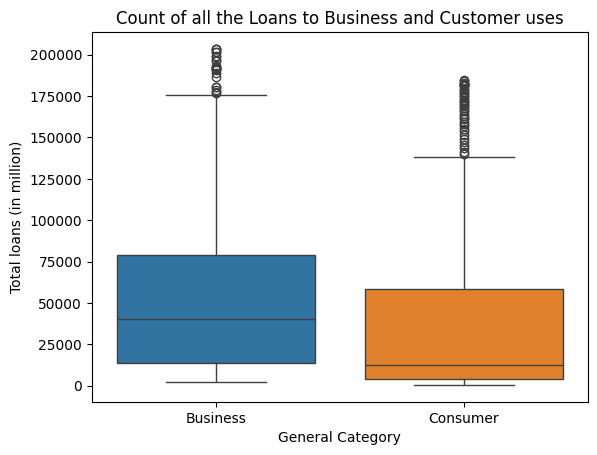

In [33]:
# Check if there are extreme values
sns.boxplot(x = 'level_1', y = df['total_loans'], data = df, hue = "level_1")
plt.title("Count of all the Loans to Business and Customer uses")
plt.xlabel("General Category")
plt.ylabel("Total loans (in million)")

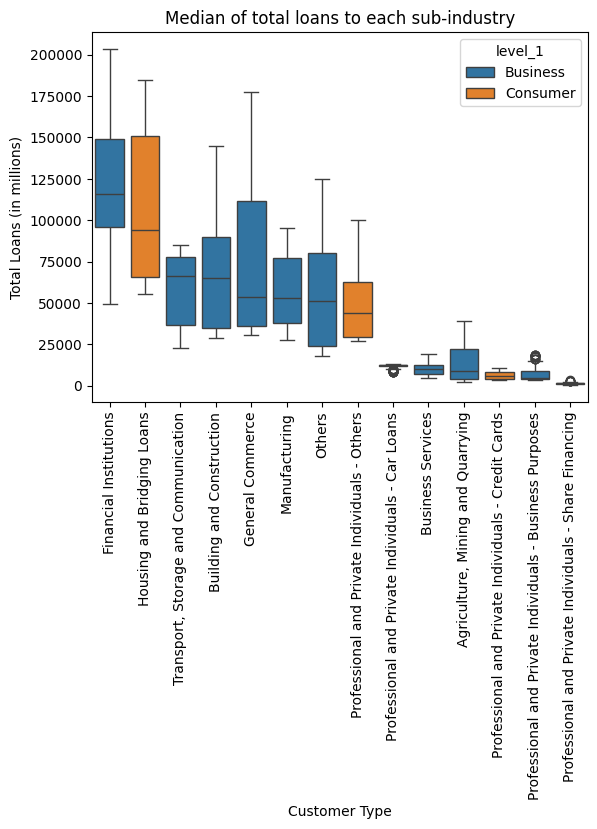

In [34]:
# Check if there are extreme values
medians = df.groupby("level_2")['total_loans'].median()
sorted_medians = medians.sort_values(ascending = False)
sorted_order = sorted_medians.index

# Plot the boxplot with the sorted order
sns.boxplot(x = 'level_2', y = df['total_loans'], data = df, order= sorted_order, hue = "level_1")
plt.title("Median of total loans to each sub-industry")
plt.xlabel("Customer Type")
plt.ylabel("Total Loans (in millions)")
plt.xticks(rotation = 90)
plt.show()

Financial Institutions have the highest average median, Share Financing has the lowest average median. General Commerce is a having a moderate average median. To observe how `total_loans` for each customer type changes, we pick customer types with highest, lowest and moderate amount of `total_loans` to see how they change over time.

In [29]:
#print(medians)
# Select data from these customers types with highest, lowest and moderate median total_loans
highest_df = df[df['level_2'] == "Financial Institutions"]
lowest_df = df[df['level_2'] == "Professional and Private Individuals - Share Financing"]
middle_df = df[df['level_2'] == "General Commerce"]

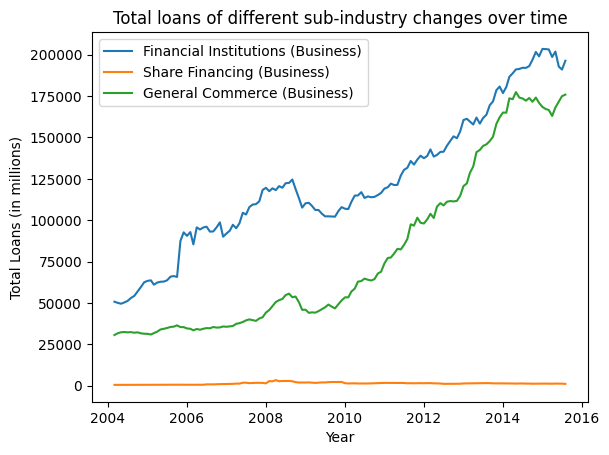

In [35]:
# Plot the line graphs
plt.plot(highest_df["datetime"], highest_df["total_loans"], label ="Financial Institutions (Business)")
plt.plot(lowest_df['datetime'], lowest_df['total_loans'], label = "Share Financing (Business)")
plt.plot(middle_df['datetime'], middle_df['total_loans'], label = "General Commerce (Business)")
plt.xlabel("Year")
plt.ylabel("Total Loans (in millions)")
plt.legend()
plt.title("Total loans of different sub-industry changes over time")
plt.show()

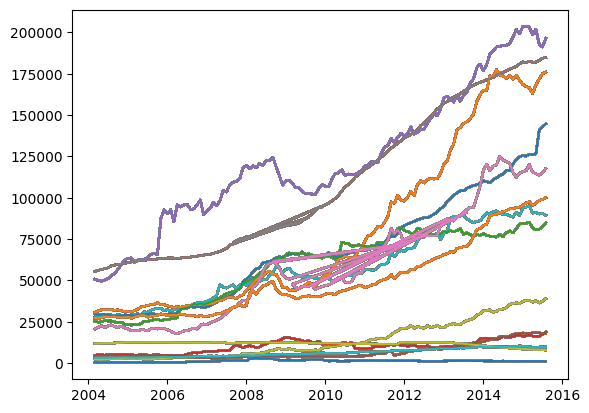

In [36]:
# Just to see the overall trends
for customer_type in customer_types:
    customer_type_df = df[df['level_2'] == customer_type]
    plt.plot(customer_type_df['datetime'],
             customer_type_df['total_loans'], label = customer_type)

plt.show()

- Share Financing remains constantly low `total_loans` from year 2005 to 2015, with amount approx = 0.
- General Commerce and Financial Institutions have increasing `total_loans` from year 2005 to 2015, with Financial Institutions constantly having a higher `total_loans` 

Banks tend to give loans to:
- Financial Institutions
- Housing and Bridging loans
- Transport Storage and Communication

Banks tend not to give loans to:
- Credit Card
- Business Purposes
- Share Financing

We see increasing trend in total_loans for customer types that have higher median `total_loans`, while for customer types that have lower median `total_loans`, banks tend not to increase the `total_loans` given to these customer types.